# Sprint 9 - Proyecto de Iván Díaz.

En este proyecto del Sprint 9 se realiza un estudio analítico sobre el comportamiento de los usuarios de Showz, una plataforma de venta de entradas para eventos. El objetivo principal es evaluar la eficacia de las campañas de marketing a través del análisis de visitas, pedidos y costos publicitarios. A lo largo del análisis se identificarán patrones de uso, conversiones por cohortes, ingresos por cliente (LTV) y retorno sobre la inversión (ROMI), con el fin de ofrecer recomendaciones fundamentadas que ayuden a optimizar el gasto en adquisición de usuarios y mejorar la rentabilidad de la empresa.

## Paso 1. Acceso a los datos y su preparación para el análisis

In [545]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [546]:
df_visits = pd.read_csv('visits_log_us.csv')
df_orders = pd.read_csv('orders_log_us.csv')
df_costs = pd.read_csv('costs_us.csv')

In [547]:
print("Datos de visitas:")
print(df_visits.head())
print()
print(df_visits.info())
print()
print()
print("Datos de órdenes:")
print(df_orders.head())
print()
print(df_orders.info())
print()
print()
print("Datos de costos:")
print(df_costs.head())
print()
print(df_costs.info())


Datos de visitas:
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uin

## Paso 2. Informes y cálculo de métricas - Visitas.


In [549]:
# 1. Decido renombrar las columnas porque veo es pertinente tener uniformidad para su análisis.
df_visits.rename(columns={'End Ts': 'end_ts', 'Start Ts': 'start_ts', 'Source Id': 'source_id', 'Uid': 'uid'}, inplace=True)
df_orders.rename(columns={'Buy Ts': 'buy_ts', 'Revenue': 'revenue', 'Uid': 'uid'}, inplace=True)
df_costs.rename(columns={'dt': 'date'}, inplace=True)
print(df_visits.columns)
print()
print(df_orders.columns)
print()
print(df_costs.columns)

Index(['Device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

Index(['source_id', 'date', 'costs'], dtype='object')


In [550]:
# 2. Veo que es necesario convertir a formato de fecha las siguientes columnas:
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])
df_costs['date'] = pd.to_datetime(df_costs['date'])

In [551]:
# 3. Procedo a revisar duplicados
print("Duplicados en visits:", df_visits.duplicated().sum())
print("Duplicados en orders:", df_orders.duplicated().sum())
print("Duplicados en costs:", df_costs.duplicated().sum())

Duplicados en visits: 0
Duplicados en orders: 0
Duplicados en costs: 0


In [572]:
# 4. Procedo a revisar los rangos de fechas
print("Rango de fechas en visits:", df_visits['start_ts'].min(), "→", df_visits['end_ts'].max())
print("Rango de fechas en orders:", df_orders['buy_ts'].min(), "→", df_orders['buy_ts'].max())
print("Rango de fechas en costs:", df_costs['date'].min(), "→", df_costs['date'].max())

Rango de fechas en visits: 2017-06-01 00:01:00 → 2018-06-01 01:26:00
Rango de fechas en orders: 2017-06-01 00:10:00 → 2018-06-01 00:02:00
Rango de fechas en costs: 2017-06-01 00:00:00 → 2018-05-31 00:00:00


In [553]:
# Decido crear columnas de fecha para agregaciones
df_visits['date'] = df_visits['start_ts'].dt.date
df_visits['week_number'] = df_visits['start_ts'].dt.isocalendar().week
df_visits['month_number'] = df_visits['start_ts'].dt.month

In [554]:
# Calculo usuarios únicos por periodo
daily_df = df_visits.groupby('date')['uid'].nunique().reset_index(name='unique_users_per_day')
weekly_df = df_visits.groupby('week_number')['uid'].nunique().reset_index(name='unique_users_per_week')
monthly_df = df_visits.groupby('month_number')['uid'].nunique().reset_index(name='unique_users_per_month')
daily_df

,date,unique_users_per_day
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
...,...,...
359,2018-05-27,620
360,2018-05-28,1039
361,2018-05-29,948
362,2018-05-30,1289


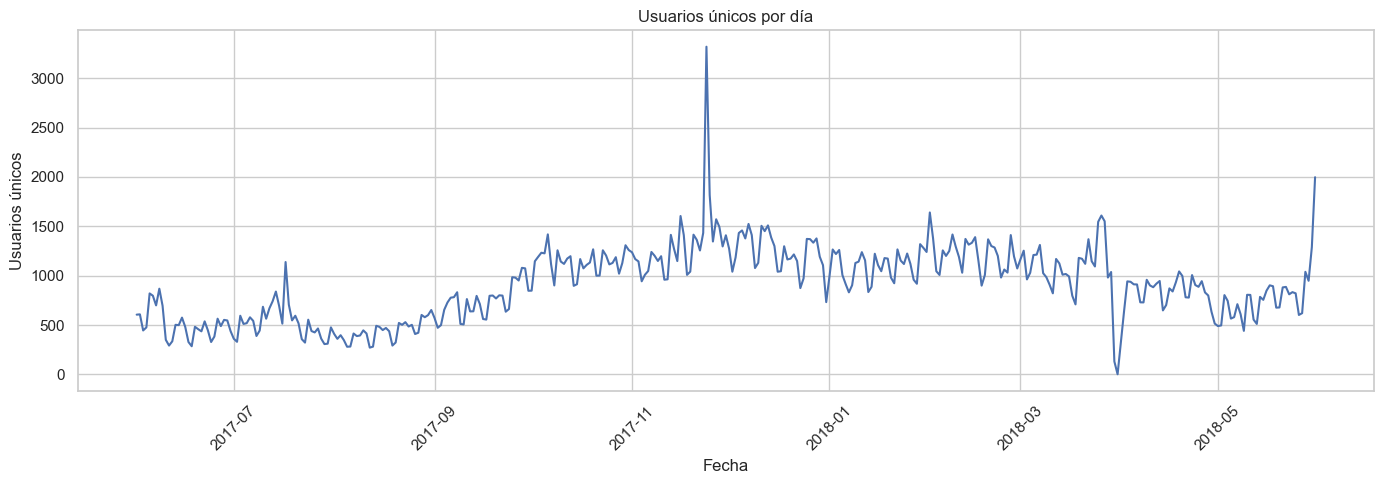

In [555]:
# Estilo Seaborn
sns.set(style="whitegrid")

# Gráfico diario
plt.figure(figsize=(14, 5))
sns.lineplot(data=daily_df, x='date', y='unique_users_per_day')
plt.title('Usuarios únicos por día')
plt.xlabel('Fecha')
plt.ylabel('Usuarios únicos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

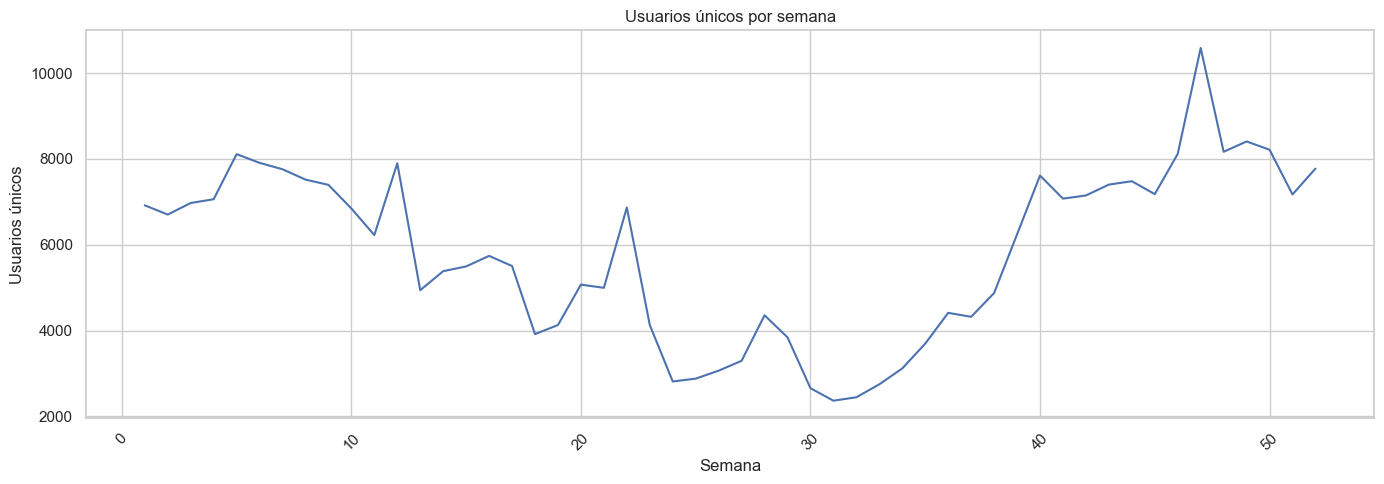

In [556]:
# Gráfico semanal
plt.figure(figsize=(14, 5))
sns.lineplot(data=weekly_df, x='week_number', y='unique_users_per_week')
plt.title('Usuarios únicos por semana')
plt.xlabel('Semana')
plt.ylabel('Usuarios únicos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

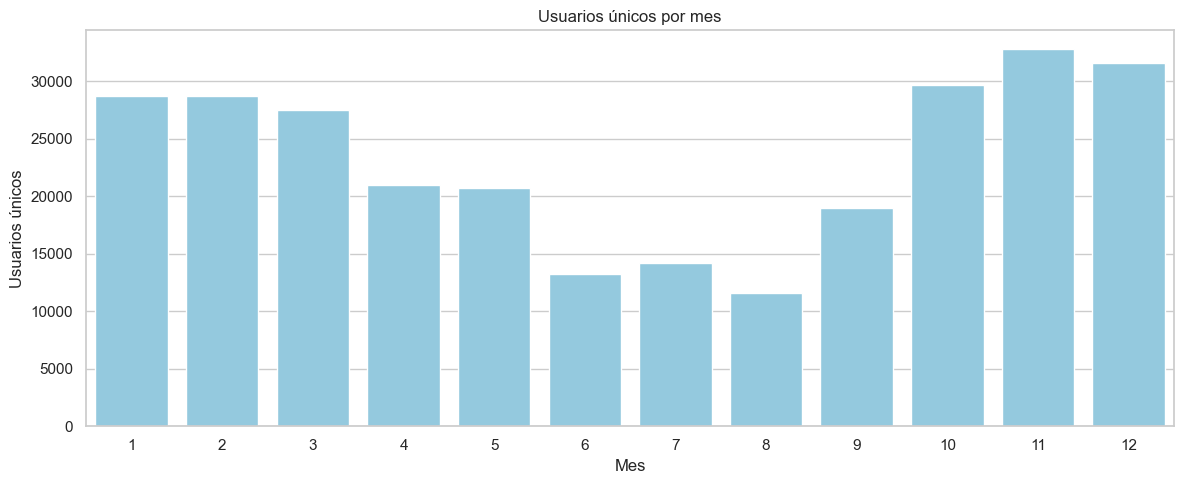

In [557]:
# Gráfico mensual
plt.figure(figsize=(12, 5))
sns.barplot(data=monthly_df, x='month_number', y='unique_users_per_month', color='skyblue')
plt.title('Usuarios únicos por mes')
plt.xlabel('Mes')
plt.ylabel('Usuarios únicos')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()


In [558]:
sessions_per_day = df_visits.groupby('date')['uid'].count().reset_index(name='sessions_per_day')

In [559]:
sessions_per_day

,date,sessions_per_day
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893
...,...,...
359,2018-05-27,672
360,2018-05-28,1156
361,2018-05-29,1035
362,2018-05-30,1410


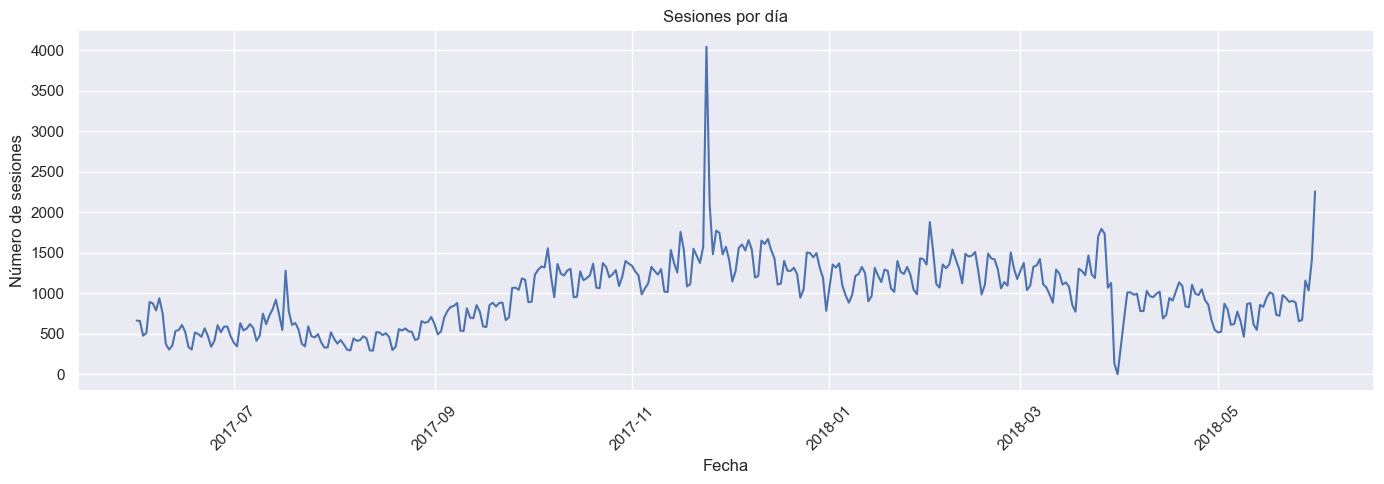

In [560]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 5))
sns.lineplot(data=sessions_per_day, x='date', y='sessions_per_day')
plt.title('Sesiones por día')
plt.xlabel('Fecha')
plt.ylabel('Número de sesiones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [561]:
df_visits['session_duration'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.total_seconds()


In [562]:
print(df_visits[['start_ts', 'end_ts', 'session_duration']].head())

             start_ts              end_ts  session_duration
0 2017-12-20 17:20:00 2017-12-20 17:38:00            1080.0
1 2018-02-19 16:53:00 2018-02-19 17:21:00            1680.0
2 2017-07-01 01:54:00 2017-07-01 01:54:00               0.0
3 2018-05-20 10:59:00 2018-05-20 11:23:00            1440.0
4 2017-12-27 14:06:00 2017-12-27 14:06:00               0.0


In [563]:
# Veo importante ordenar por usuario y fecha de inicio de sesión
df_visits = df_visits.sort_values(['uid', 'start_ts'])

In [564]:
# procedo a calcular el tiempo entre sesiones consecutivas por usuario (en horas) / *
df_visits['prev_session'] = df_visits.groupby('uid')['start_ts'].shift(1)
df_visits['hours_since_last'] = (df_visits['start_ts'] - df_visits['prev_session']).dt.total_seconds() / 3600

Investigación: *shift(1) te da acceso a la fila anterior de cada grupo, útil para calcular diferencias, intervalos de tiempo, detectar cambios, etc.

In [566]:
# También puedes calcular en días
df_visits['days_since_last'] = (df_visits['start_ts'] - df_visits['prev_session']).dt.days

In [567]:
print(df_visits[['uid', 'start_ts', 'prev_session', 'hours_since_last', 'days_since_last']].head(10))

                    uid            start_ts        prev_session  \
196543   11863502262781 2018-03-01 17:27:00                 NaT   
257333   49537067089222 2018-02-06 15:55:00                 NaT   
173818  297729379853735 2017-06-07 18:47:00                 NaT   
173142  313578113262317 2017-09-18 22:49:00                 NaT   
192554  313578113262317 2018-02-18 15:17:00 2017-09-18 22:49:00   
113873  313578113262317 2018-03-11 17:23:00 2018-02-18 15:17:00   
34588   325320750514679 2017-09-30 14:29:00                 NaT   
41778   325320750514679 2018-02-26 12:33:00 2017-09-30 14:29:00   
188450  397399764396656 2018-01-18 12:32:00                 NaT   
183750  407573351275847 2017-06-17 13:40:00                 NaT   

        hours_since_last  days_since_last  
196543               NaN              NaN  
257333               NaN              NaN  
173818               NaN              NaN  
173142               NaN              NaN  
192554       3664.466667            152.0 

In [568]:
print("Promedio de horas entre sesiones (usuarios que regresan):", df_visits['hours_since_last'].mean())
print("Mediana de horas entre sesiones:", df_visits['hours_since_last'].median())

Promedio de horas entre sesiones (usuarios que regresan): 674.6446501461799
Mediana de horas entre sesiones: 117.73333333333333


## Paso 2. Informes y cálculo de métricas - Ventas.


Veo que para poder hacer estos cálculos y métricas debo primeramente analizar la conversión de cohortes por lo que quiero abordar el análisis de la siguiente manera: 1.Encontrar la primera visita de cada usuario, 2.Encontrar la primera compra de cada usuario, 3.Unir ambas tablas para calcular la diferencia de días, 4.Ordenar los usuarios segun el tiempo de conversión.

In [574]:
#1
first_visit = (
    df_visits
      .sort_values('start_ts') 
      .drop_duplicates(subset='uid', keep='first')[['uid','source_id','start_ts']]
      .rename(columns={'start_ts':'first_visit'})
)
first_visit

,uid,source_id,first_visit
308527,13890188992670018146,5,2017-06-01 00:01:00
260646,16152015161748786004,3,2017-06-01 00:02:00
245715,16706502037388497502,3,2017-06-01 00:02:00
235930,8842918131297115663,3,2017-06-01 00:04:00
11727,10329302124590727494,1,2017-06-01 00:09:00
...,...,...,...
299620,83872787173869366,4,2018-05-31 23:59:00
294423,10406407303624848652,2,2018-05-31 23:59:00
198329,3720373600909378583,3,2018-05-31 23:59:00
263781,4906562732540547408,1,2018-05-31 23:59:00


In [ ]:
#2
first_purchase = df_orders.groupby('uid')['buy_ts'].min().reset_index().rename(columns={'buy_ts': 'first_purchase'})
first_purchase

In [ ]:
#3
user_journey = pd.merge(first_visit, first_purchase, on='uid', how='inner')
user_journey['conversion_days'] = (user_journey['first_purchase'] - user_journey['first_visit']).dt.days
user_journey

In [ ]:
user_journey['conversion_cohort'] = user_journey['conversion_days'].astype(str) + 'd'


In [ ]:
print(user_journey.columns)

In [ ]:
#4
cohort_counts = user_journey['conversion_cohort'].value_counts().sort_index().reset_index()
cohort_counts.columns = ['conversion_cohort', 'user_count']
print(cohort_counts)

In [ ]:
# Orden por días de conversión
sorted_days = user_journey['conversion_days'].sort_values()

In [ ]:
# Cálculo del porcentaje acumulado de usuarios
cumulative = np.arange(1, len(sorted_days) + 1) / len(sorted_days) * 100

In [ ]:

plt.figure(figsize=(12, 6))
plt.step(sorted_days, cumulative, where='post', color="skyblue")
plt.title('Curva acumulada de conversión: % de usuarios convertidos vs días desde registro')
plt.xlabel('Días entre registro y primera compra')
plt.ylabel('% de usuarios convertidos')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

In [ ]:
total_users = len(user_journey)

# Porcentaje que convierte el mismo día
pct_0d = (user_journey['conversion_days'] == 0).sum() / total_users * 100

# Porcentaje que convierte en 1 día o menos
pct_1d = (user_journey['conversion_days'] <= 1).sum() / total_users * 100

# Porcentaje que convierte en 7 días o menos
pct_7d = (user_journey['conversion_days'] <= 7).sum() / total_users * 100

# Porcentaje que convierte en 30 días o menos
pct_30d = (user_journey['conversion_days'] <= 30).sum() / total_users * 100

# Porcentaje total de usuarios que finalmente convierten (puede ser 100% si solo tienes los que compraron)
pct_total = 100  # o (user_journey['conversion_days'].notna().sum() / total_users) * 100

print(f"Porcentaje que convierte el mismo día (0d): {pct_0d:.2f}%")
print(f"Porcentaje que convierte en 1 día o menos: {pct_1d:.2f}%")
print(f"Porcentaje que convierte en 7 días o menos: {pct_7d:.2f}%")
print(f"Porcentaje que convierte en 30 días o menos: {pct_30d:.2f}%")
print(f"Porcentaje total de usuarios que convierten: {pct_total:.2f}%")


No entendía el gráfico, procedí a hacer un análicis de distinta manera para poder entender los porcentajes de conversión, veo que es mas fácil entenderlo de esta manera.

In [ ]:
average_purchase = df_orders['revenue'].mean()

print(f"Tamaño promedio de compra: ${average_purchase:.2f}")

In [ ]:
# Calcular LTV por usuario
ltv_by_user = df_orders.groupby('uid')['revenue'].sum().reset_index(name='ltv')
print(ltv_by_user.head())

In [ ]:
ltv_avg = ltv_by_user['ltv'].mean()
print(f"LTV promedio (ticket total promedio por usuario): ${ltv_avg:.2f}")

In [ ]:
ltv_total = ltv_by_user['ltv'].sum()
print(f"LTV total (ingresos totales de todos los usuarios): ${ltv_total:.2f}")

### ¿Cuánto dinero se gastó?

a)Total invertido

In [ ]:
# Total general
total_spent = df_costs['costs'].sum()
print(f"Total invertido en marketing: ${total_spent:.2f}")
print()
# Por fuente de adquisición
spent_by_source = df_costs.groupby('source_id')['costs'].sum().reset_index()
print(spent_by_source)
print()
print()
# A lo largo del tiempo (por mes)
df_costs['date'] = pd.to_datetime(df_costs['date'])
df_costs['month'] = df_costs['date'].dt.strftime('%Y-%m')
spent_by_month = df_costs.groupby('month')['costs'].sum().reset_index()
print(spent_by_month)

b)CAC

In [576]:
# Usuarios que hicieron al menos una compra
buyers = df_orders['uid'].unique()
buyers_first_visit = first_visit[first_visit['uid'].isin(buyers)]

# Cuántos clientes nuevos trajo cada fuente
new_customers_by_source = buyers_first_visit.groupby('source_id')['uid'].nunique().reset_index(name='new_customers')

# Gasto por fuente (ya calculado antes: spent_by_source)
# Unimos ambas tablas por 'source_id'
cac = pd.merge(spent_by_source, new_customers_by_source, on='source_id', how='left')
cac['CAC'] = cac['costs'] / cac['new_customers']
print(cac)


   source_id      costs  new_customers        CAC
0          1   20833.27           2899   7.186364
1          2   42806.04           3506  12.209367
2          3  141321.63          10473  13.493901
3          4   61073.60          10296   5.931779
4          5   51757.10           6931   7.467479
5          9    5517.49           1088   5.071222
6         10    5822.49           1329   4.381106


c) ROMI

In [582]:
# 1. Obtener la fuente de adquisición de cada usuario (primera visita)
first_visit = (
    df_visits
    .sort_values('start_ts')
    .drop_duplicates('uid', keep='first')[['uid', 'source_id']]
)

# 2. Atribuir cada pedido a su canal de adquisición
orders_with_source = df_orders.merge(first_visit, on='uid', how='left')

# 3. Sumar ingresos por canal
revenue_by_source = (
    orders_with_source
    .groupby('source_id')['revenue']
    .sum()
    .reset_index(name='revenue')
)

# 4. Sumar costos por canal
spent_by_source = (
    df_costs
    .groupby('source_id')['costs']
    .sum()
    .reset_index(name='costs')
)

# 5. Unir ingresos y costos, calcular ROMI
romi_df = (
    spent_by_source
    .merge(revenue_by_source, on='source_id', how='left')
    .fillna(0)
)
romi_df['ROMI'] = (romi_df['revenue'] - romi_df['costs']) / romi_df['costs']

# 6. Mostrar resultados
print(romi_df[['source_id', 'costs', 'revenue', 'ROMI']])


   source_id      costs   revenue      ROMI
0          1   20833.27  31090.55  0.492351
1          2   42806.04  46923.61  0.096191
2          3  141321.63  54511.24 -0.614275
3          4   61073.60  56696.83 -0.071664
4          5   51757.10  52624.02  0.016750
5          9    5517.49   5759.40  0.043844
6         10    5822.49   4450.33 -0.235665


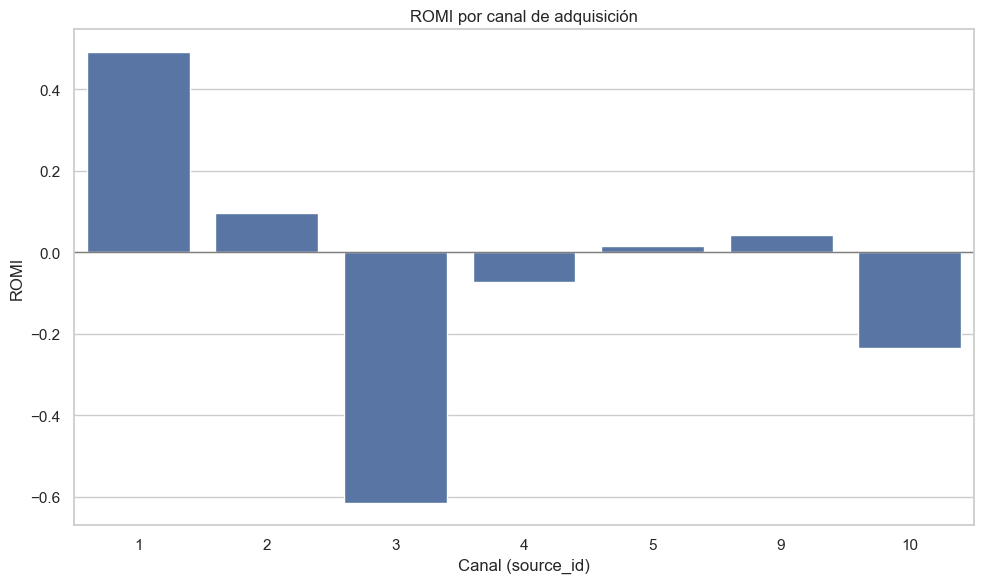

In [584]:
sns.set(style="whitegrid", palette="deep", context="notebook")
plt.figure(figsize=(10, 6))
sns.barplot(data=romi_df, x='source_id', y='ROMI')
plt.title('ROMI por canal de adquisición')
plt.xlabel('Canal (source_id)')
plt.ylabel('ROMI')
plt.axhline(0, color='gray', linewidth=1)
plt.tight_layout()
plt.show()

ROMI por canal de adquisición:

- **Canal 1**: ROMI ≈ 0.5 → por cada $1 invertido, obtienes $1.50 de ingreso.  
- **Canal 2**: ROMI ≈ 0.1 → retorno leve.  
- **Canal 3**: ROMI ≈ –0.62 → pérdidas considerables.  
- **Canal 4**: ROMI ≈ –0.07 → muy cerca de punto de equilibrio.  
- **Canales 5 y 9**: ROMI ligeramente positivo (~0.02–0.05).  
- **Canal 10**: ROMI ≈ –0.24 → pérdida moderada.  


## Paso 3 Conclusión.

## Conclusión y recomendaciones para los expertos en marketing

### Fuentes/plataformas recomendadas para inversión

De acuerdo con el análisis realizado, se recomienda priorizar inversiones en las siguientes fuentes:

1. **Canal 1**  
   - **ROMI más alto (~0.5)**: Por cada $1 invertido genera aproximadamente $1.50 en ingresos, lo que indica alta rentabilidad.
   - **CAC favorable**: Presenta un costo por cliente adquirido más eficiente respecto a otros canales.

2. **Canal 2**  
   - **ROMI positivo (~0.1)**: Aunque menor que el canal 1, mantiene una rentabilidad positiva.
   - Buen rendimiento en la adquisición rápida de clientes.

3. **Canales 5 y 9**  
   - **ROMI ligeramente positivo (~0.02-0.05)**: Rentabilidad moderada pero estable.
   - Menor costo de adquisición; se recomienda analizar estos canales a mayor profundidad antes de realizar próximas inversiones.

---

### Métricas clave consideradas

Las recomendaciones anteriores se fundamentan principalmente en estas métricas críticas:

- **ROMI (Return On Marketing Investment):** Mide la rentabilidad real de cada canal. Priorizar canales con ROMI positivo garantiza retornos efectivos.
- **CAC (Costo de Adquisición del Cliente):** Un CAC menor maximiza la eficiencia presupuestaria, facilitando el crecimiento sostenible.
- **Tiempo de conversión:** Los canales que generan conversiones rápidas permiten obtener retornos inmediatos, beneficiando el flujo de caja.
